In [124]:
import sys
import random as rd

import numpy as np
import matplotlib.pyplot as plt

# Generate Droplets

In [125]:
droplet_count = 20
domain_limit = 10
radius_limits = [0.1, 4]
eps = 0.035

tab_count = 2

plot_pt_count = 1000
plot_contourf_color_count = 100

100.0000%


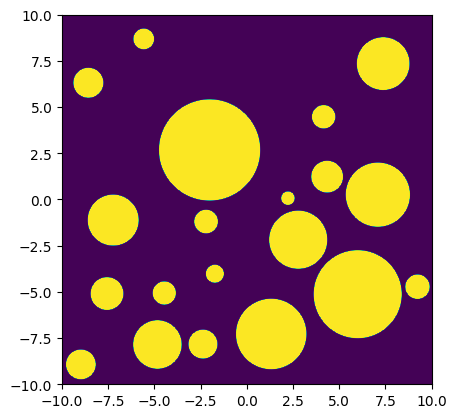

In [126]:
point_scale = lambda x, limit: (x - 0.5)*2*limit
radius_scale = lambda x, limits: x*(limits[1]-limits[0]) + limits[0]

center_points = []
radii = []

def there_is_overlap(center_lst, radius_lst, center, radius, eps, domain_limit):

    for i in range(len(center_lst)):

        radius_threshhold = radius + eps

        is_over_x = (center[0] + radius_threshhold) > domain_limit
        is_over_x = is_over_x or (center[0] - radius_threshhold) < -domain_limit

        is_over_y = (center[1] + radius_threshhold) > domain_limit
        is_over_y = is_over_y or (center[1] - radius_threshhold) < -domain_limit

        if is_over_x or is_over_y:
            return True

        distance = (center_lst[i][0]-center[0])**2
        distance += (center_lst[i][1]-center[1])**2
        distance = np.sqrt(distance)

        radius_threshhold += radius_lst[i]

        if distance < radius_threshhold:
            return True

    return False

for i in range(droplet_count):

    center = [0., 0.]
    radius = 0.
    has_overlap = True

    while has_overlap:
        center = [point_scale(rd.random(), domain_limit) for _ in range(2)]
        radius = radius_scale(rd.random(), radius_limits)
        has_overlap = there_is_overlap(
            center_points, radii, center, radius, eps, domain_limit
        )

    center_points.append(center)
    radii.append(radius)

    perc = ((i+1) / droplet_count)*100
    perc_str = f"{perc:.4f}%"
    sys.stdout.write(f"{perc:.4f}%\r")
    sys.stdout.flush()
sys.stdout.write("\n")

center_points = np.array(center_points)
radii = np.array(radii)

############################################################

x = np.linspace(-domain_limit, domain_limit, plot_pt_count)
xm, ym = np.meshgrid(x, x)

def tanhmin(xm, ym, center, radius, eps):
    offset = np.sqrt(
        (xm - center[0])**2 +
        (ym - center[1])**2
    )
    distance = offset - radius
    return 0.5 * (1.0 + np.tanh(-3.0 * distance / eps))

zm = np.zeros(xm.shape)
for i in range(droplet_count):
    pt_tuple = tuple(center_points[i].tolist())
    zm += tanhmin(xm, ym, pt_tuple, radii[i], eps)

fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
ax.contourf(xm, ym, zm, plot_contourf_color_count)

plt.show()

In [127]:
input_lst = []

tab_str = "    " * tab_count
for i in range(droplet_count):
    x_str = f"{center_points[i,0]:.4f}"
    y_str = f"{center_points[i,1]:.4f}"
    r_str = f"{radii[i]:.4f}"
    single_str = f"{tab_str}{{{r_str}, {x_str}, {y_str}}}"
    input_lst.append(single_str)

input_str = ",\n".join(input_lst)
print(input_str)

        {2.7112, -2.0175, 2.6798},
        {2.3547, 5.9956, -5.1259},
        {0.6123, -2.2096, -1.1937},
        {1.7090, 7.0873, 0.2604},
        {0.6322, 9.2312, -4.7199},
        {0.8313, 4.3429, 1.2351},
        {1.3989, 7.3747, 7.3517},
        {0.4598, -1.7336, -4.0173},
        {1.2839, -4.8410, -7.8467},
        {1.3511, -7.2358, -1.1159},
        {0.8592, -7.5694, -5.0918},
        {0.6039, 4.1530, 4.4765},
        {0.5317, -5.5820, 8.6876},
        {0.3362, 2.2205, 0.0716},
        {0.5999, -4.4684, -5.0615},
        {1.8790, 1.3160, -7.2774},
        {1.5446, 2.7787, -2.1763},
        {0.7827, -8.5784, 6.3161},
        {0.7550, -2.3768, -7.8263},
        {0.7755, -8.9836, -8.9248}
